In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#matplotlib 日本語化対応
import japanize_matplotlib


In [3]:
df_all = pd.read_csv('all.csv')
#df_all の　30~36行目を表示
df_all[30:36]

,Unnamed: 0,x,d1,d2,d3,d4,d5,w1,w2,w3,...,c3,c4,c5,c6,p,none_s,image_s,announce_s,image_sound_s,image_announce_s
30,30,31,9.5315,0.4201,6.8229,2.11463,5.86608,42.72710,26.17389,26.36388,...,28,17,23,25,5,2.4667,4.1333,5.0000,4.0556,4.0556
31,31,32,4.1359,0.1694,1.3210,2.93938,4.32040,22.57982,16.88658,12.05032,...,22,13,11,12,4,3.0000,3.3889,4.2111,3.0889,3.8444
32,32,33,3.0471,-0.8066,3.4866,2.54958,3.97575,17.50018,11.13775,10.55516,...,21,23,20,19,3,3.0000,3.7222,3.6667,3.6667,3.7222
33,33,34,7.4574,5.5953,6.2773,7.03843,8.18501,18.34553,11.31914,12.16216,...,12,28,19,18,5,3.0444,3.7111,3.3000,3.3000,3.1778
34,34,35,6.6637,1.4400,4.3149,4.62139,5.41970,20.41180,13.70617,14.08719,...,19,19,11,6,2,2.9889,2.7333,3.0556,2.9111,2.8000
35,35,36,1.0075,1.3439,2.5615,3.53970,4.28851,26.23617,18.92944,17.92372,...,30,28,11,11,4,3.2667,3.4556,3.2444,2.6111,3.3222


In [4]:
#none_s,image_s,announce_s,image_sound_s,image_announce_s
df_all[['none_s','image_s','announce_s','image_sound_s']].head()

,none_s,image_s,announce_s,image_sound_s
0,1.6111,3.1556,3.7000,3.6667
1,3.0000,3.0000,3.0000,3.0000
2,2.4667,2.4667,2.7333,2.6222
3,2.2778,3.3778,3.9000,3.2889
4,1.4444,4.4111,4.5778,4.1778


In [5]:
df_all.columns

Index(['Unnamed: 0', 'x', 'd1', 'd2', 'd3', 'd4', 'd5', 'w1', 'w2', 'w3', 'w4',
       'w5', 'c1', 'c2', 'c3', 'c4', 'c5', 'c6', 'p', 'none_s', 'image_s',
       'announce_s', 'image_sound_s', 'image_announce_s'],
      dtype='object')

In [6]:
new_column_names = {'d1': '安全運転特性', 'd2': '不安定な運転特性','d3': '心配性特性', 'd4': 'ステイタス特性', 'd5': '事前準備特性','w1': '道路状況把握負担', 'w2': '心身状況負担','w3': '運転ペース阻害負担', 'w4': '車環境負担','w5': '視野環境負担','c1': '写真タイプ', 'c2': '三次元映像タイプ','c3': '言語映像タイプ', 'c4': '言語抽象タイプ','c5': '聴覚言語タイプ', 'c6': '聴覚&音タイプ','p': '行動変容フェーズ', 'none_s': '提示なし','image_s': '画像のみ', 'announce_s': '音声のみ','image_sound_s': '画像+報知音', 'image_announce_s': '画像+音声'}

df_all = df_all.rename(columns=new_column_names)


In [7]:
df_all_s = df_all[['提示なし', '画像のみ', '音声のみ', '画像+報知音']]
df_all_s[6:13]


,提示なし,画像のみ,音声のみ,画像+報知音
6,3.0000,3.0000,3.0000,3.0000
7,3.2222,3.0333,3.1778,2.9444
8,2.8778,2.9778,3.0889,3.0222
9,3.0000,2.7333,3.0444,2.7333
10,2.0222,4.5556,4.8000,3.9444
11,2.7778,3.8000,4.2889,3.3000
12,2.4667,3.4889,3.4667,3.4889


In [8]:
df_all_in = df_all[['安全運転特性', '不安定な運転特性', '心配性特性', 'ステイタス特性', '事前準備特性',
       '道路状況把握負担', '心身状況負担', '運転ペース阻害負担', '車環境負担', '視野環境負担', '写真タイプ',
       '三次元映像タイプ', '言語映像タイプ', '言語抽象タイプ', '聴覚言語タイプ', '聴覚&音タイプ', '行動変容フェーズ']]
df_all_in

,安全運転特性,不安定な運転特性,心配性特性,ステイタス特性,事前準備特性,道路状況把握負担,心身状況負担,運転ペース阻害負担,車環境負担,視野環境負担,写真タイプ,三次元映像タイプ,言語映像タイプ,言語抽象タイプ,聴覚言語タイプ,聴覚&音タイプ,行動変容フェーズ
0,6.2937,1.9398,6.7618,3.07992,5.72156,36.96507,25.87807,21.29791,21.00362,14.88221,20,30,29,21,10,6,3
1,11.0338,6.1047,7.2883,7.54295,9.90751,25.40064,16.89495,16.52988,16.46094,11.70966,20,21,14,8,12,21,3
2,7.1932,2.1034,4.9684,5.66562,8.38533,29.94836,20.88529,19.59672,20.50303,14.87523,21,19,18,16,18,15,4
3,7.8981,-0.9757,4.2858,3.84009,4.87743,26.87720,18.93591,16.00807,17.58007,11.67031,21,31,28,16,17,11,4
4,9.7256,0.0349,7.1680,3.90703,6.30194,43.20713,28.51156,24.68393,25.27235,19.50599,28,27,23,24,24,23,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
799,7.5822,0.1201,6.5722,3.32963,4.75933,22.04394,17.21857,11.89841,14.83118,10.16673,22,27,33,19,18,11,4
800,5.6149,-0.7314,1.6795,3.74132,5.60217,29.58012,15.73032,14.89273,16.04473,10.39065,18,20,33,18,24,10,4
801,6.0455,2.0958,3.8635,4.97563,5.69270,28.18144,19.74430,19.20815,16.45026,12.30557,21,30,14,16,11,21,2
802,8.6738,-0.4216,1.4291,4.27503,5.49286,31.06191,21.50243,19.40287,18.43385,14.97270,15,24,28,26,17,6,4


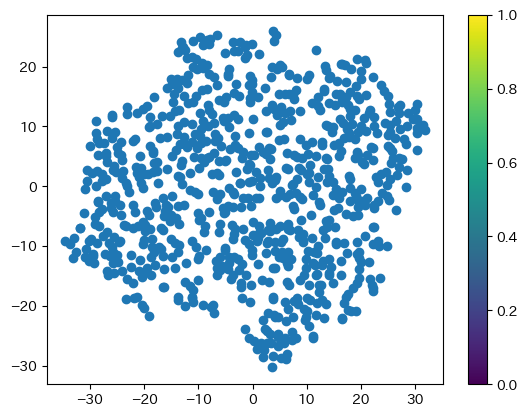

/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


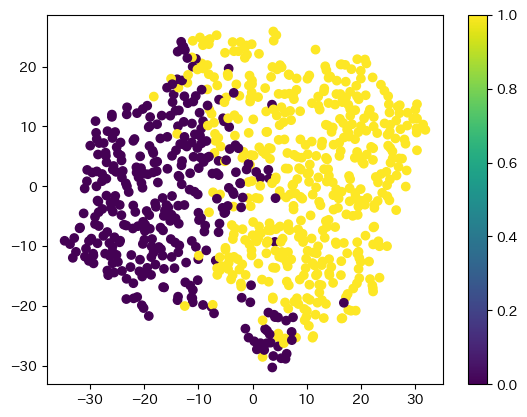

In [9]:
#t-sne
#空間が分離できているかどうかの確認
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=0)
tsne.fit(df_all_in)
x = tsne.fit_transform(df_all_in)
plt.scatter(x[:, 0], x[:, 1])
plt.colorbar()
plt.show()

#k-means
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, random_state=0)
kmeans.fit(df_all_in)
df_all['cluster'] = kmeans.labels_

#クラスタリング結果の可視化
plt.scatter(x[:, 0], x[:, 1], c=df_all['cluster'])
plt.colorbar()
plt.show()



In [10]:
df_all_drop_exp = pd.read_csv('all_drop_exp.csv')
df_all_drop_exp

,Unnamed: 0,d1,d2,d3,d4,d5,w1,w2,w3,w4,...,c3,c4,c5,c6,p,none_s,image_s,announce_s,image_sound_s,image_announce_s
0,0,6.2937,1.9398,6.7618,3.07992,5.72156,36.96507,25.87807,21.29791,21.00362,...,29,21,10,6,3,1.6111,3.1556,3.7000,3.6667,3.5000
1,2,7.1932,2.1034,4.9684,5.66562,8.38533,29.94836,20.88529,19.59672,20.50303,...,18,16,18,15,4,2.4667,2.4667,2.7333,2.6222,3.4222
2,3,7.8981,-0.9757,4.2858,3.84009,4.87743,26.87720,18.93591,16.00807,17.58007,...,28,16,17,11,4,2.2778,3.3778,3.9000,3.2889,3.7889
3,4,9.7256,0.0349,7.1680,3.90703,6.30194,43.20713,28.51156,24.68393,25.27235,...,23,24,24,23,5,1.4444,4.4111,4.5778,4.1778,4.6889
4,5,4.9113,1.4880,3.0357,4.70687,6.26354,26.34567,23.30003,23.58674,17.89807,...,16,11,22,22,3,2.3556,3.4556,3.3111,2.5222,3.9778
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
679,797,8.5748,-1.1702,4.7669,4.87733,7.84963,27.71802,19.01448,16.56406,16.81861,...,30,14,14,10,5,2.3111,3.1778,3.8667,3.3556,4.0000
680,798,10.2154,-1.1652,5.1767,2.77794,4.07748,21.64954,14.42384,14.39132,14.72991,...,36,13,21,29,2,2.9667,2.8222,2.7556,2.8667,2.8778
681,800,5.6149,-0.7314,1.6795,3.74132,5.60217,29.58012,15.73032,14.89273,16.04473,...,33,18,24,10,4,2.4667,4.0556,4.2778,3.7778,4.0333
682,802,8.6738,-0.4216,1.4291,4.27503,5.49286,31.06191,21.50243,19.40287,18.43385,...,28,26,17,6,4,1.8444,4.6111,4.2444,4.0222,4.3333


In [11]:
df_all_drop_exp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 684 entries, 0 to 683
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        684 non-null    int64  
 1   d1                684 non-null    float64
 2   d2                684 non-null    float64
 3   d3                684 non-null    float64
 4   d4                684 non-null    float64
 5   d5                684 non-null    float64
 6   w1                684 non-null    float64
 7   w2                684 non-null    float64
 8   w3                684 non-null    float64
 9   w4                684 non-null    float64
 10  w5                684 non-null    float64
 11  c1                684 non-null    int64  
 12  c2                684 non-null    int64  
 13  c3                684 non-null    int64  
 14  c4                684 non-null    int64  
 15  c5                684 non-null    int64  
 16  c6                684 non-null    int64  
 1

In [12]:
new_column_names = {'d1': '安全運転特性', 'd2': '不安定な運転特性','d3': '心配性特性', 'd4': 'ステイタス特性', 'd5': '事前準備特性','w1': '道路状況把握負担', 'w2': '心身状況負担','w3': '運転ペース阻害負担', 'w4': '車環境負担','w5': '視野環境負担','c1': '写真タイプ', 'c2': '三次元映像タイプ','c3': '言語映像タイプ', 'c4': '言語抽象タイプ','c5': '聴覚言語タイプ', 'c6': '聴覚&音タイプ','p': '行動変容フェーズ', 'none_s': '提示なし','image_s': '画像のみ', 'announce_s': '音声のみ','image_sound_s': '画像+報知音', 'image_announce_s': '画像+音声'}

df_all_drop_exp = df_all_drop_exp.rename(columns=new_column_names)

In [13]:
df_all_drop_s = df_all_drop_exp[['提示なし', '画像のみ', '音声のみ', '画像+報知音']]
#df_all_drop_sに関して，'none_s', 'image_s','announce_s', 'image_sound_s', 'image_announce_s'の最大値を持つカラム名をカラムとして追加
df_all_drop_s_max = df_all_drop_s.idxmax(axis=1)
df_all_drop_s_max


0      音声のみ
1      音声のみ
2      音声のみ
3      音声のみ
4      画像のみ
       ... 
679    音声のみ
680    提示なし
681    音声のみ
682    画像のみ
683    音声のみ
Length: 684, dtype: object

In [14]:
df_all_drop_exp['target'] = df_all_drop_s_max

In [15]:
#df_all_drop_s_maxをone-hotエンコーディング
df_all_drop_s_max_one_hot = pd.get_dummies(df_all_drop_s_max).astype(int)
df_all_drop_s_max_one_hot

,提示なし,画像+報知音,画像のみ,音声のみ
0,0,0,0,1
1,0,0,0,1
2,0,0,0,1
3,0,0,0,1
4,0,0,1,0
...,...,...,...,...
679,0,0,0,1
680,1,0,0,0
681,0,0,0,1
682,0,0,1,0


In [16]:
# 特徴量とターゲット変数の設定
features = ['安全運転特性', '不安定な運転特性', '心配性特性', 'ステイタス特性', '事前準備特性',
       '道路状況把握負担', '心身状況負担', '運転ペース阻害負担', '車環境負担', '視野環境負担', '写真タイプ',
       '三次元映像タイプ', '言語映像タイプ', '言語抽象タイプ', '聴覚言語タイプ', '聴覚&音タイプ', '行動変容フェーズ']
# target = ['none_s', 'image_s','announce_s', 'image_sound_s', 'image_announce_s']  

# 特徴量とターゲットの抽出
X = df_all_drop_exp[features]
print(X)
y = df_all_drop_s_max
y

      安全運転特性  不安定な運転特性   心配性特性  ステイタス特性   事前準備特性  道路状況把握負担    心身状況負担  \
0     6.2937    1.9398  6.7618  3.07992  5.72156  36.96507  25.87807   
1     7.1932    2.1034  4.9684  5.66562  8.38533  29.94836  20.88529   
2     7.8981   -0.9757  4.2858  3.84009  4.87743  26.87720  18.93591   
3     9.7256    0.0349  7.1680  3.90703  6.30194  43.20713  28.51156   
4     4.9113    1.4880  3.0357  4.70687  6.26354  26.34567  23.30003   
..       ...       ...     ...      ...      ...       ...       ...   
679   8.5748   -1.1702  4.7669  4.87733  7.84963  27.71802  19.01448   
680  10.2154   -1.1652  5.1767  2.77794  4.07748  21.64954  14.42384   
681   5.6149   -0.7314  1.6795  3.74132  5.60217  29.58012  15.73032   
682   8.6738   -0.4216  1.4291  4.27503  5.49286  31.06191  21.50243   
683   3.5565   -0.0380  3.4472  2.81113  3.50357  30.25131  18.98164   

     運転ペース阻害負担     車環境負担    視野環境負担  写真タイプ  三次元映像タイプ  言語映像タイプ  言語抽象タイプ  \
0     21.29791  21.00362  14.88221     20        30       29  

0      音声のみ
1      音声のみ
2      音声のみ
3      音声のみ
4      画像のみ
       ... 
679    音声のみ
680    提示なし
681    音声のみ
682    画像のみ
683    音声のみ
Length: 684, dtype: object

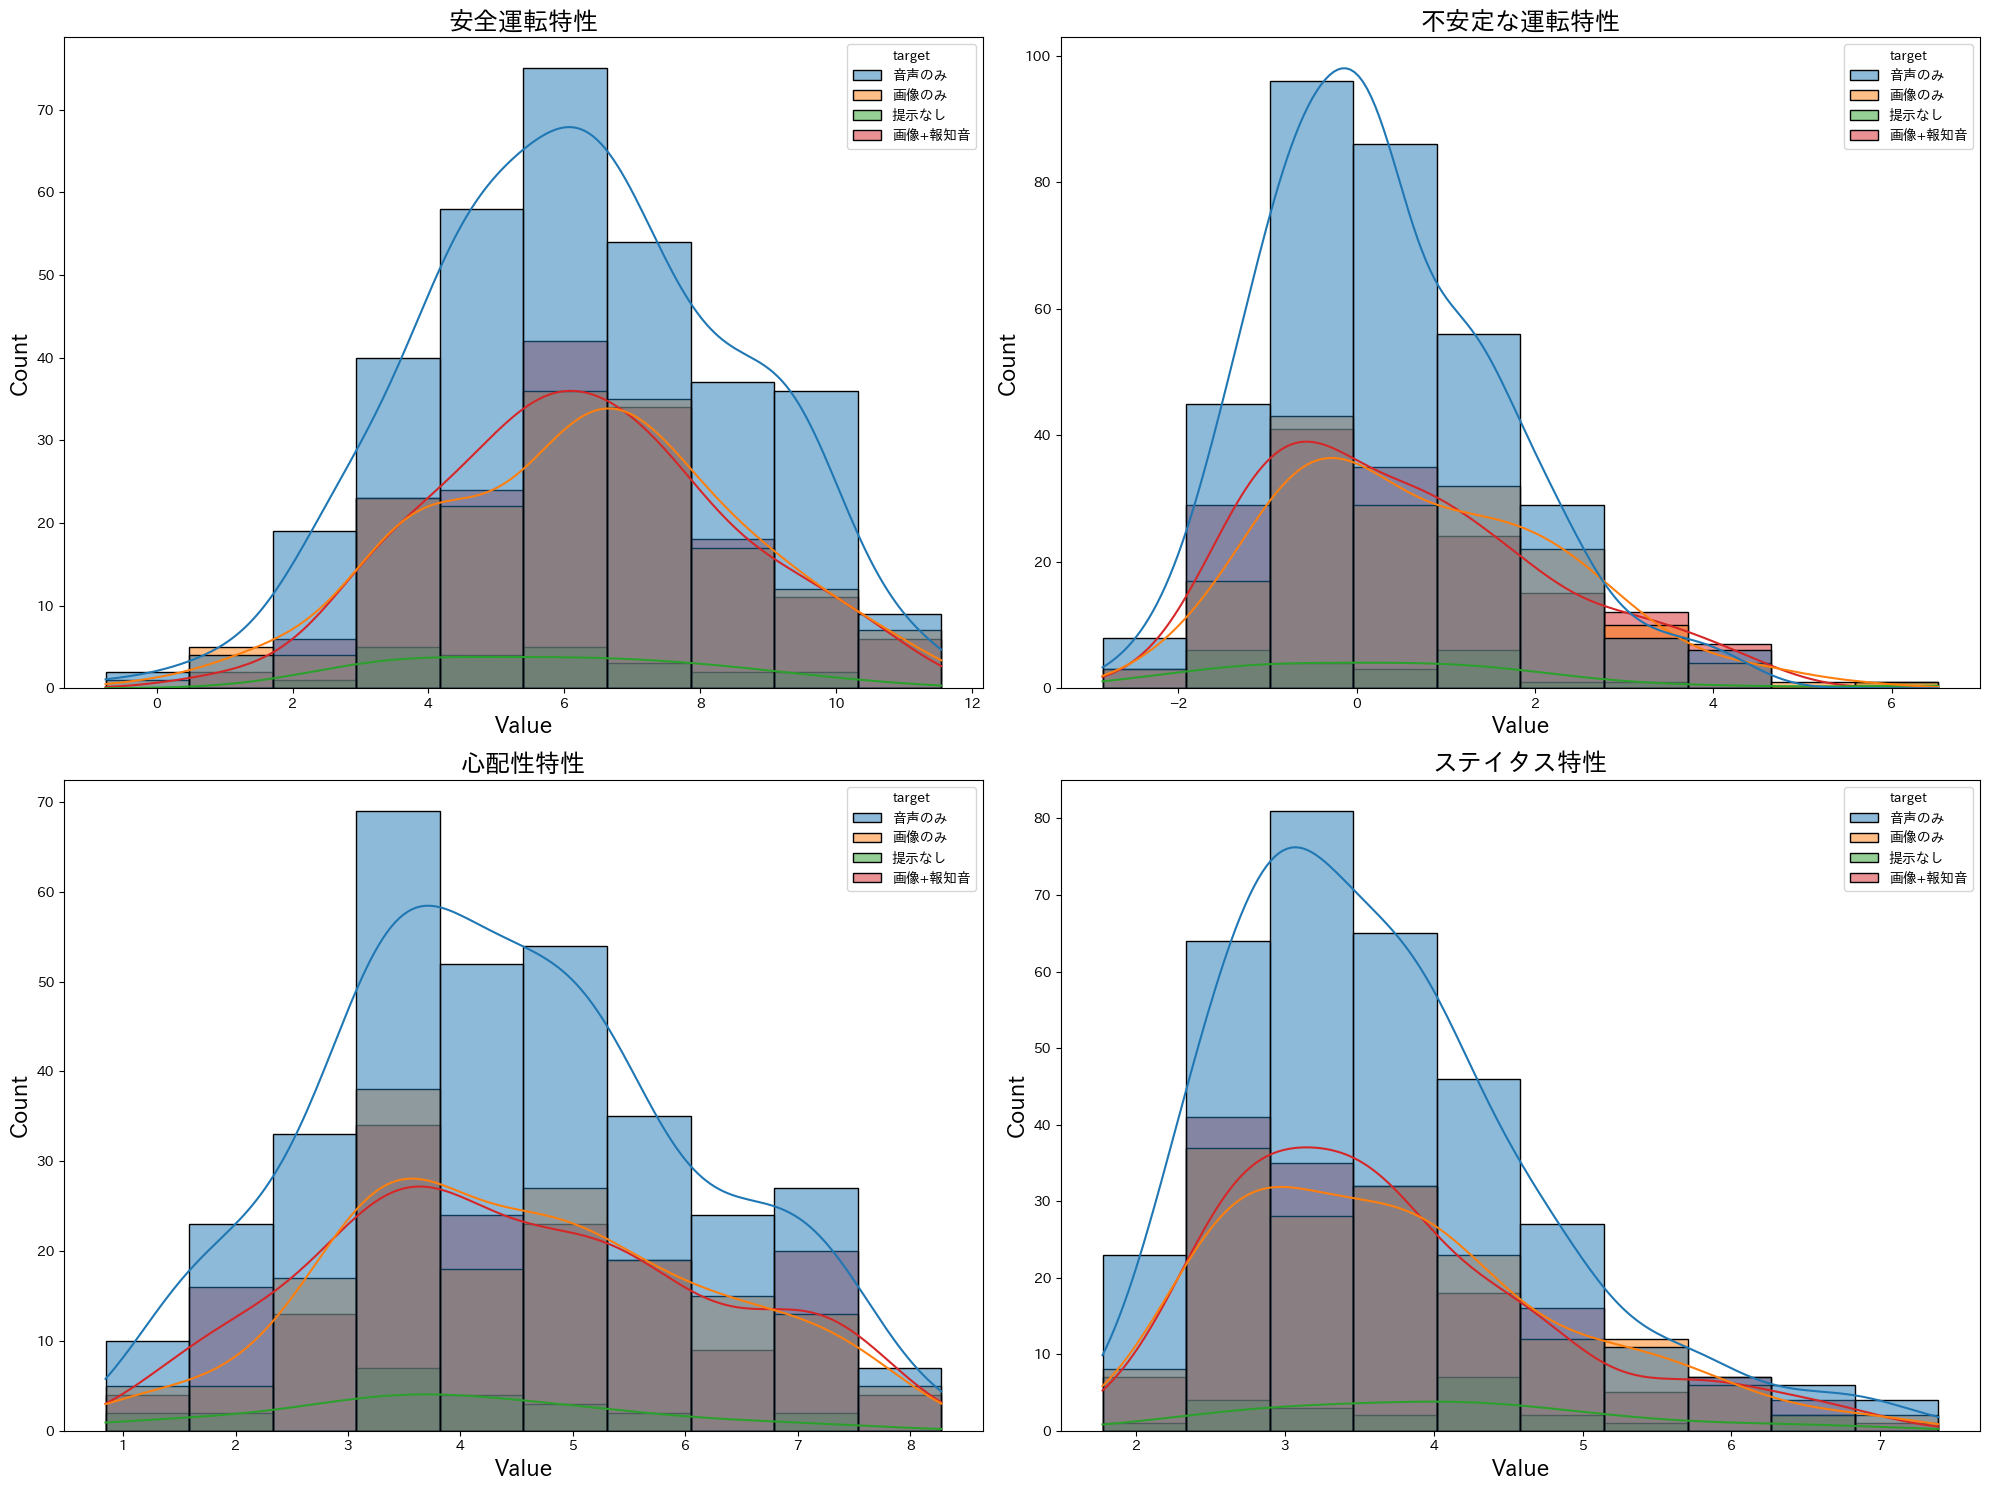

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

# 特徴量のリスト
features_group_1 = ['安全運転特性', '不安定な運転特性', '心配性特性', 'ステイタス特性']

# ビンの数を指定
bin_count = 10  # ここでビンの数を指定

# プロットの作成
fig, axes = plt.subplots(2, 2, figsize=(20, 15))

for i, feature in enumerate(features_group_1):
    ax = axes[i // 2, i % 2]
    sns.histplot(data=df_all_drop_exp, x=feature, hue='target', kde=True, ax=ax, bins=bin_count)
    ax.set_title(feature, fontsize=18)
    ax.set_xlabel('Value', fontsize=16)
    ax.set_ylabel('Count', fontsize=16)
    handles, labels = ax.get_legend_handles_labels()
    # ax.legend(handles=handles, labels=labels, fontsize=14)  # レジェンドを手動で追加

plt.tight_layout()
plt.show()


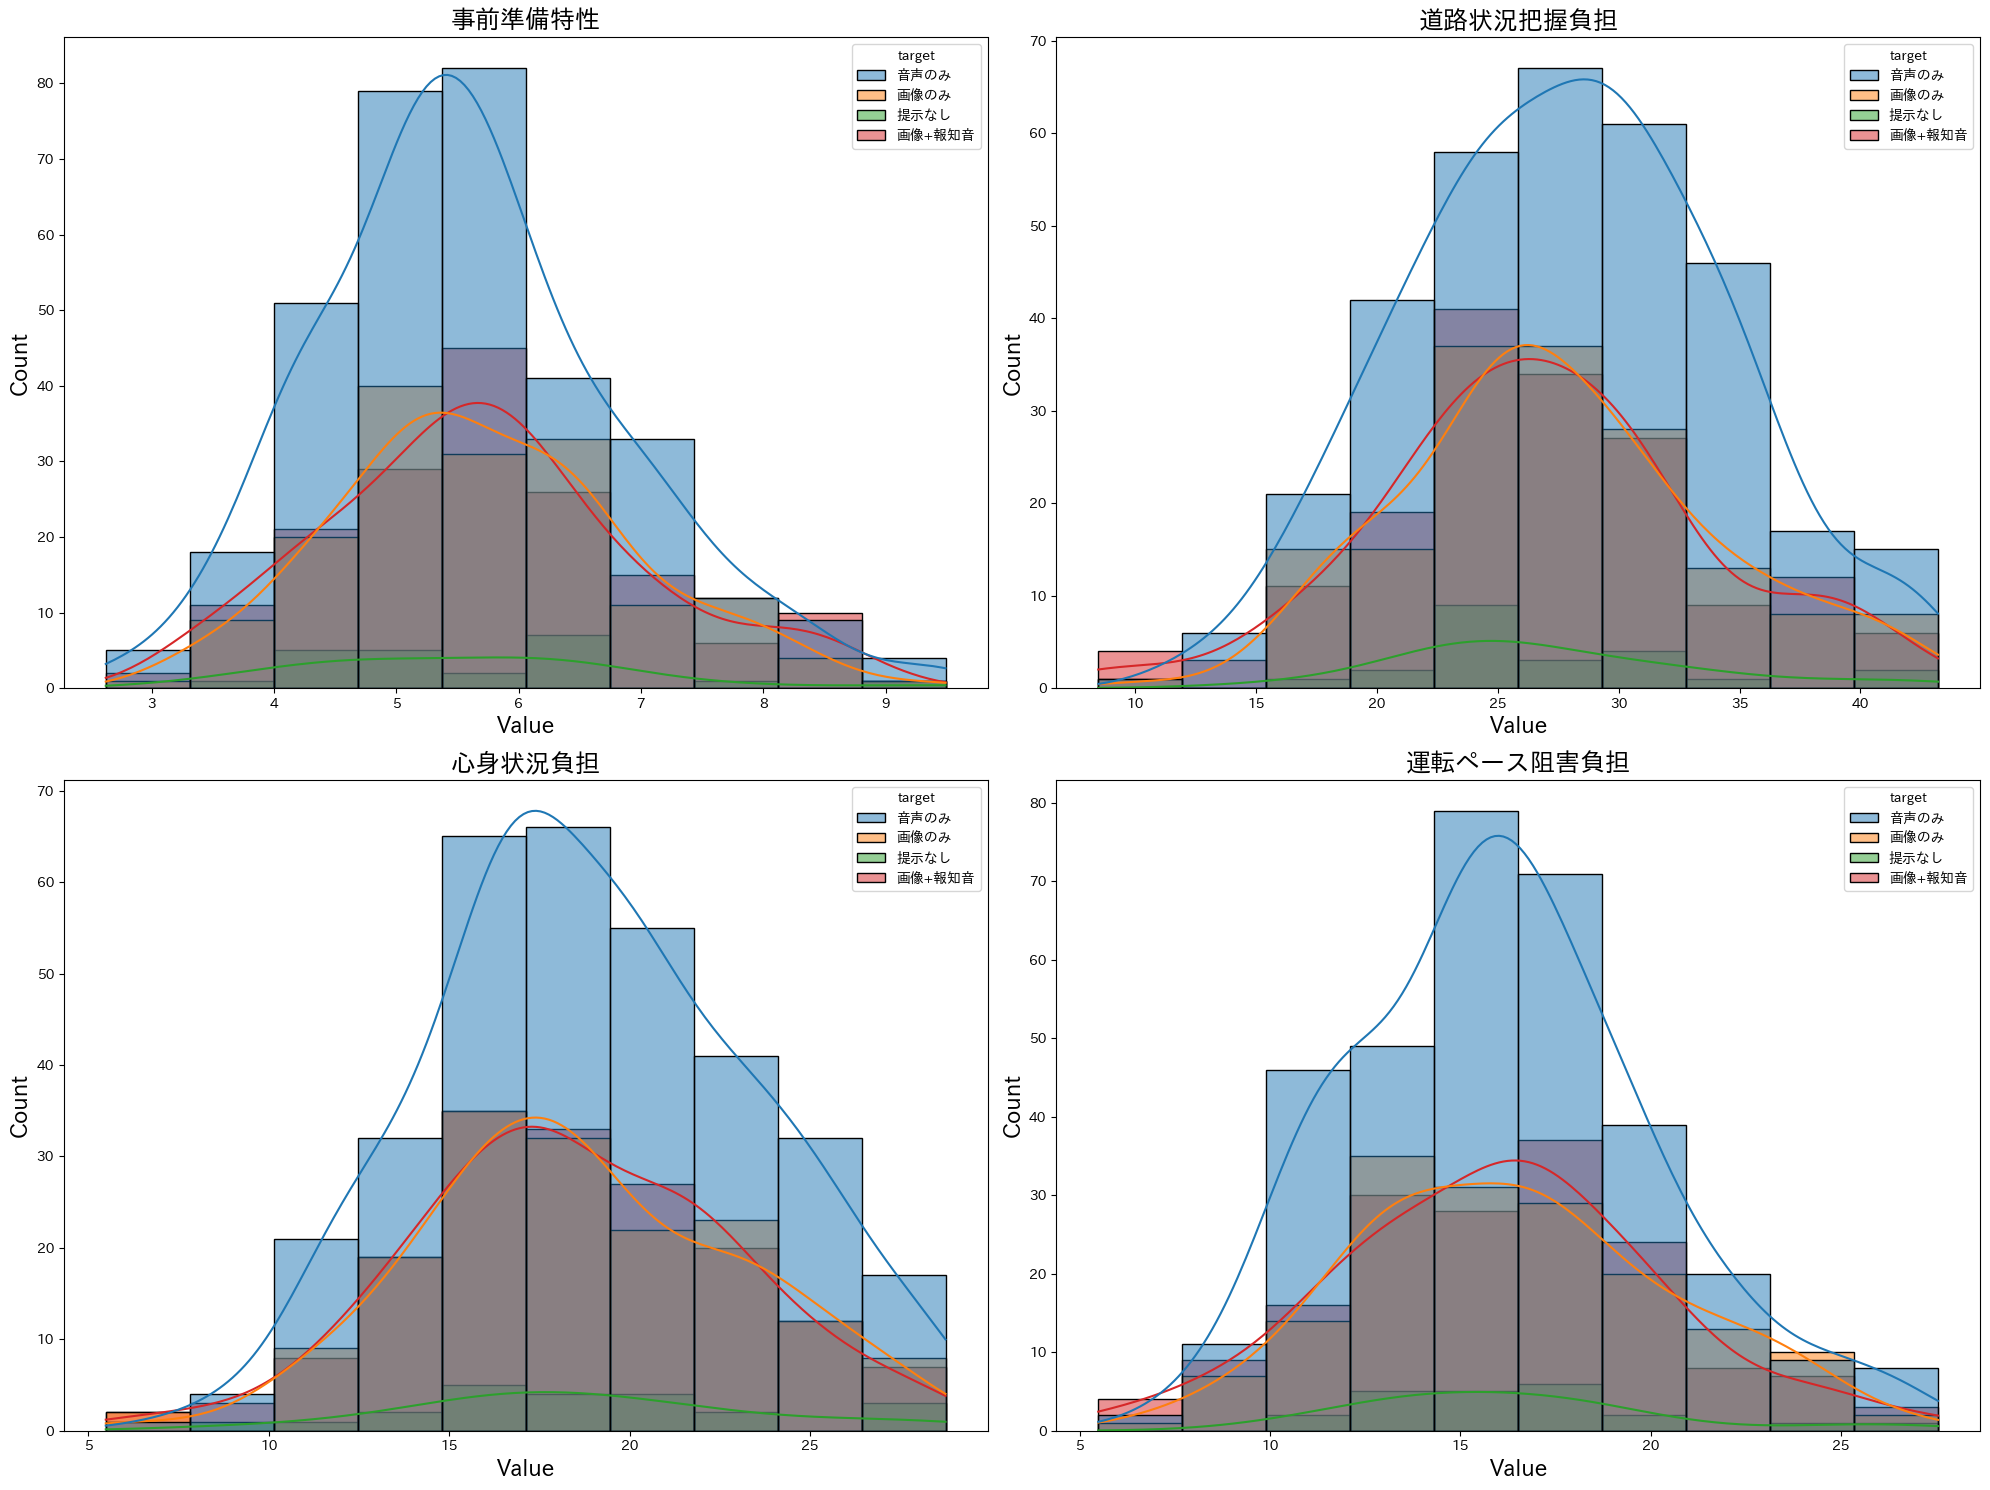

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

# 特徴量のグループ化
features_group_2 = ['事前準備特性', '道路状況把握負担', '心身状況負担', '運転ペース阻害負担']

# ビンの数を指定
bin_count = 10  # ここでビンの数を指定

# ヒストグラムを作成（次の4つの特徴量）
fig, axes = plt.subplots(2, 2, figsize=(20, 15))

for i, feature in enumerate(features_group_2):
    ax = axes[i // 2, i % 2]
    sns.histplot(data=df_all_drop_exp, x=feature, hue='target', kde=True, ax=ax, bins=bin_count)
    ax.set_title(feature, fontsize=18)
    ax.set_xlabel('Value', fontsize=16)
    ax.set_ylabel('Count', fontsize=16)
    

plt.tight_layout()
plt.show()


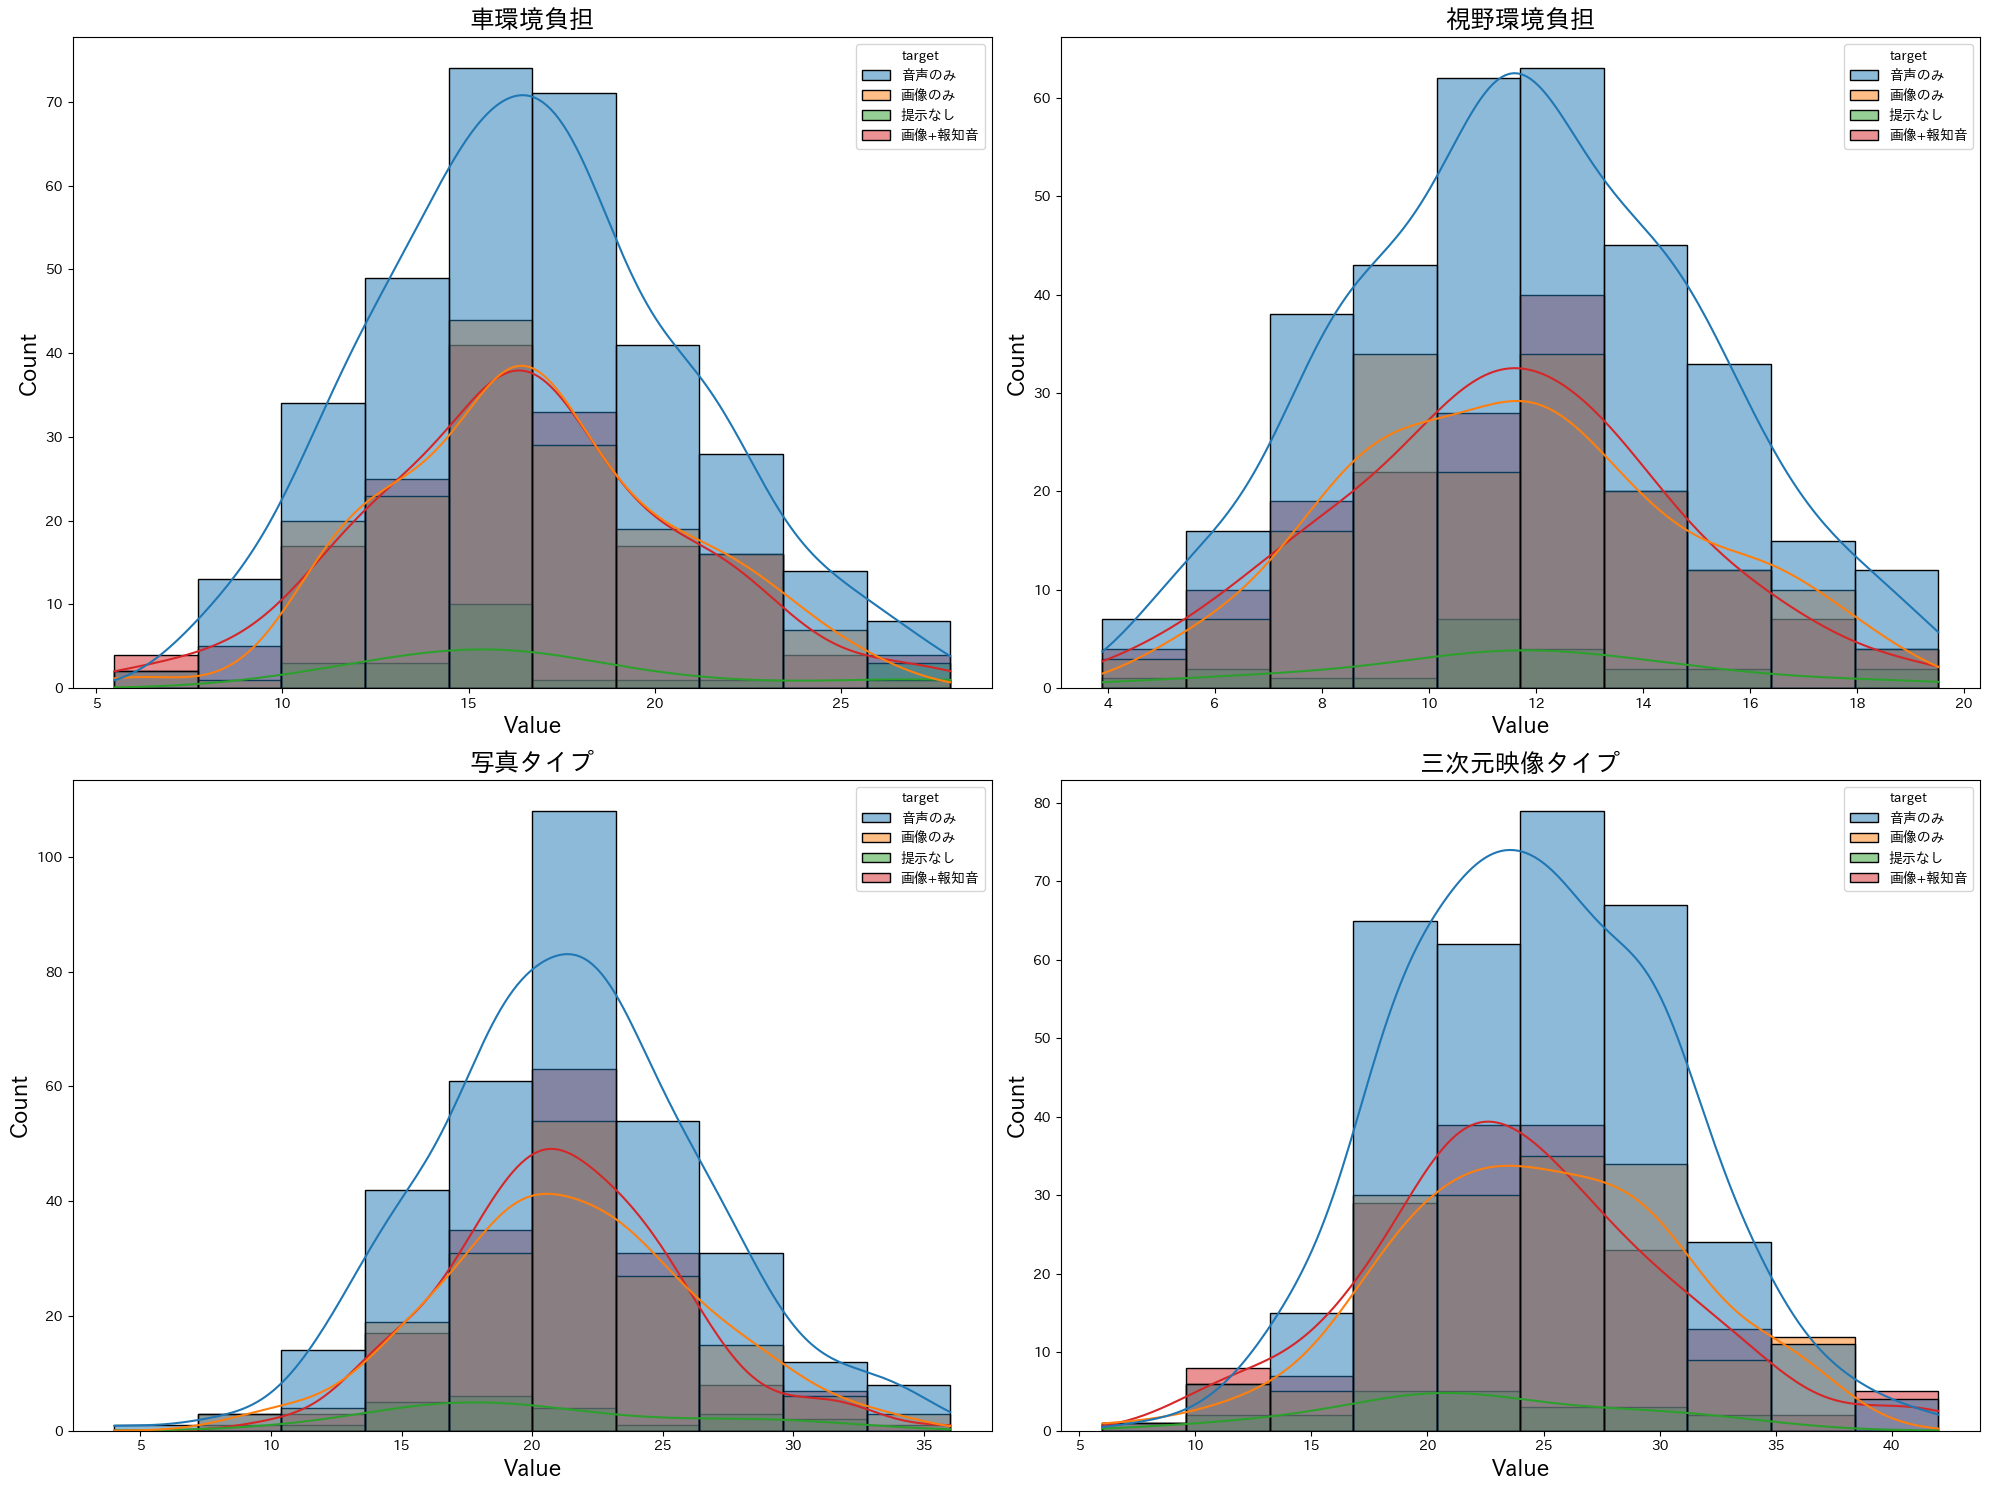

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

# 特徴量のリスト
features_group_3 = ['車環境負担', '視野環境負担', '写真タイプ', '三次元映像タイプ']

# プロットの作成
fig, axes = plt.subplots(2, 2, figsize=(20, 15))

for i, feature in enumerate(features_group_3):
    ax = axes[i // 2, i % 2]
    sns.histplot(data=df_all_drop_exp, x=feature, hue='target', kde=True, ax=ax, bins=bin_count)
    ax.set_title(feature, fontsize=18)
    ax.set_xlabel('Value', fontsize=16)
    ax.set_ylabel('Count', fontsize=16)
    # ax.legend(fontsize=14)  # レジェンドのフォントサイズを指定

plt.tight_layout()
plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


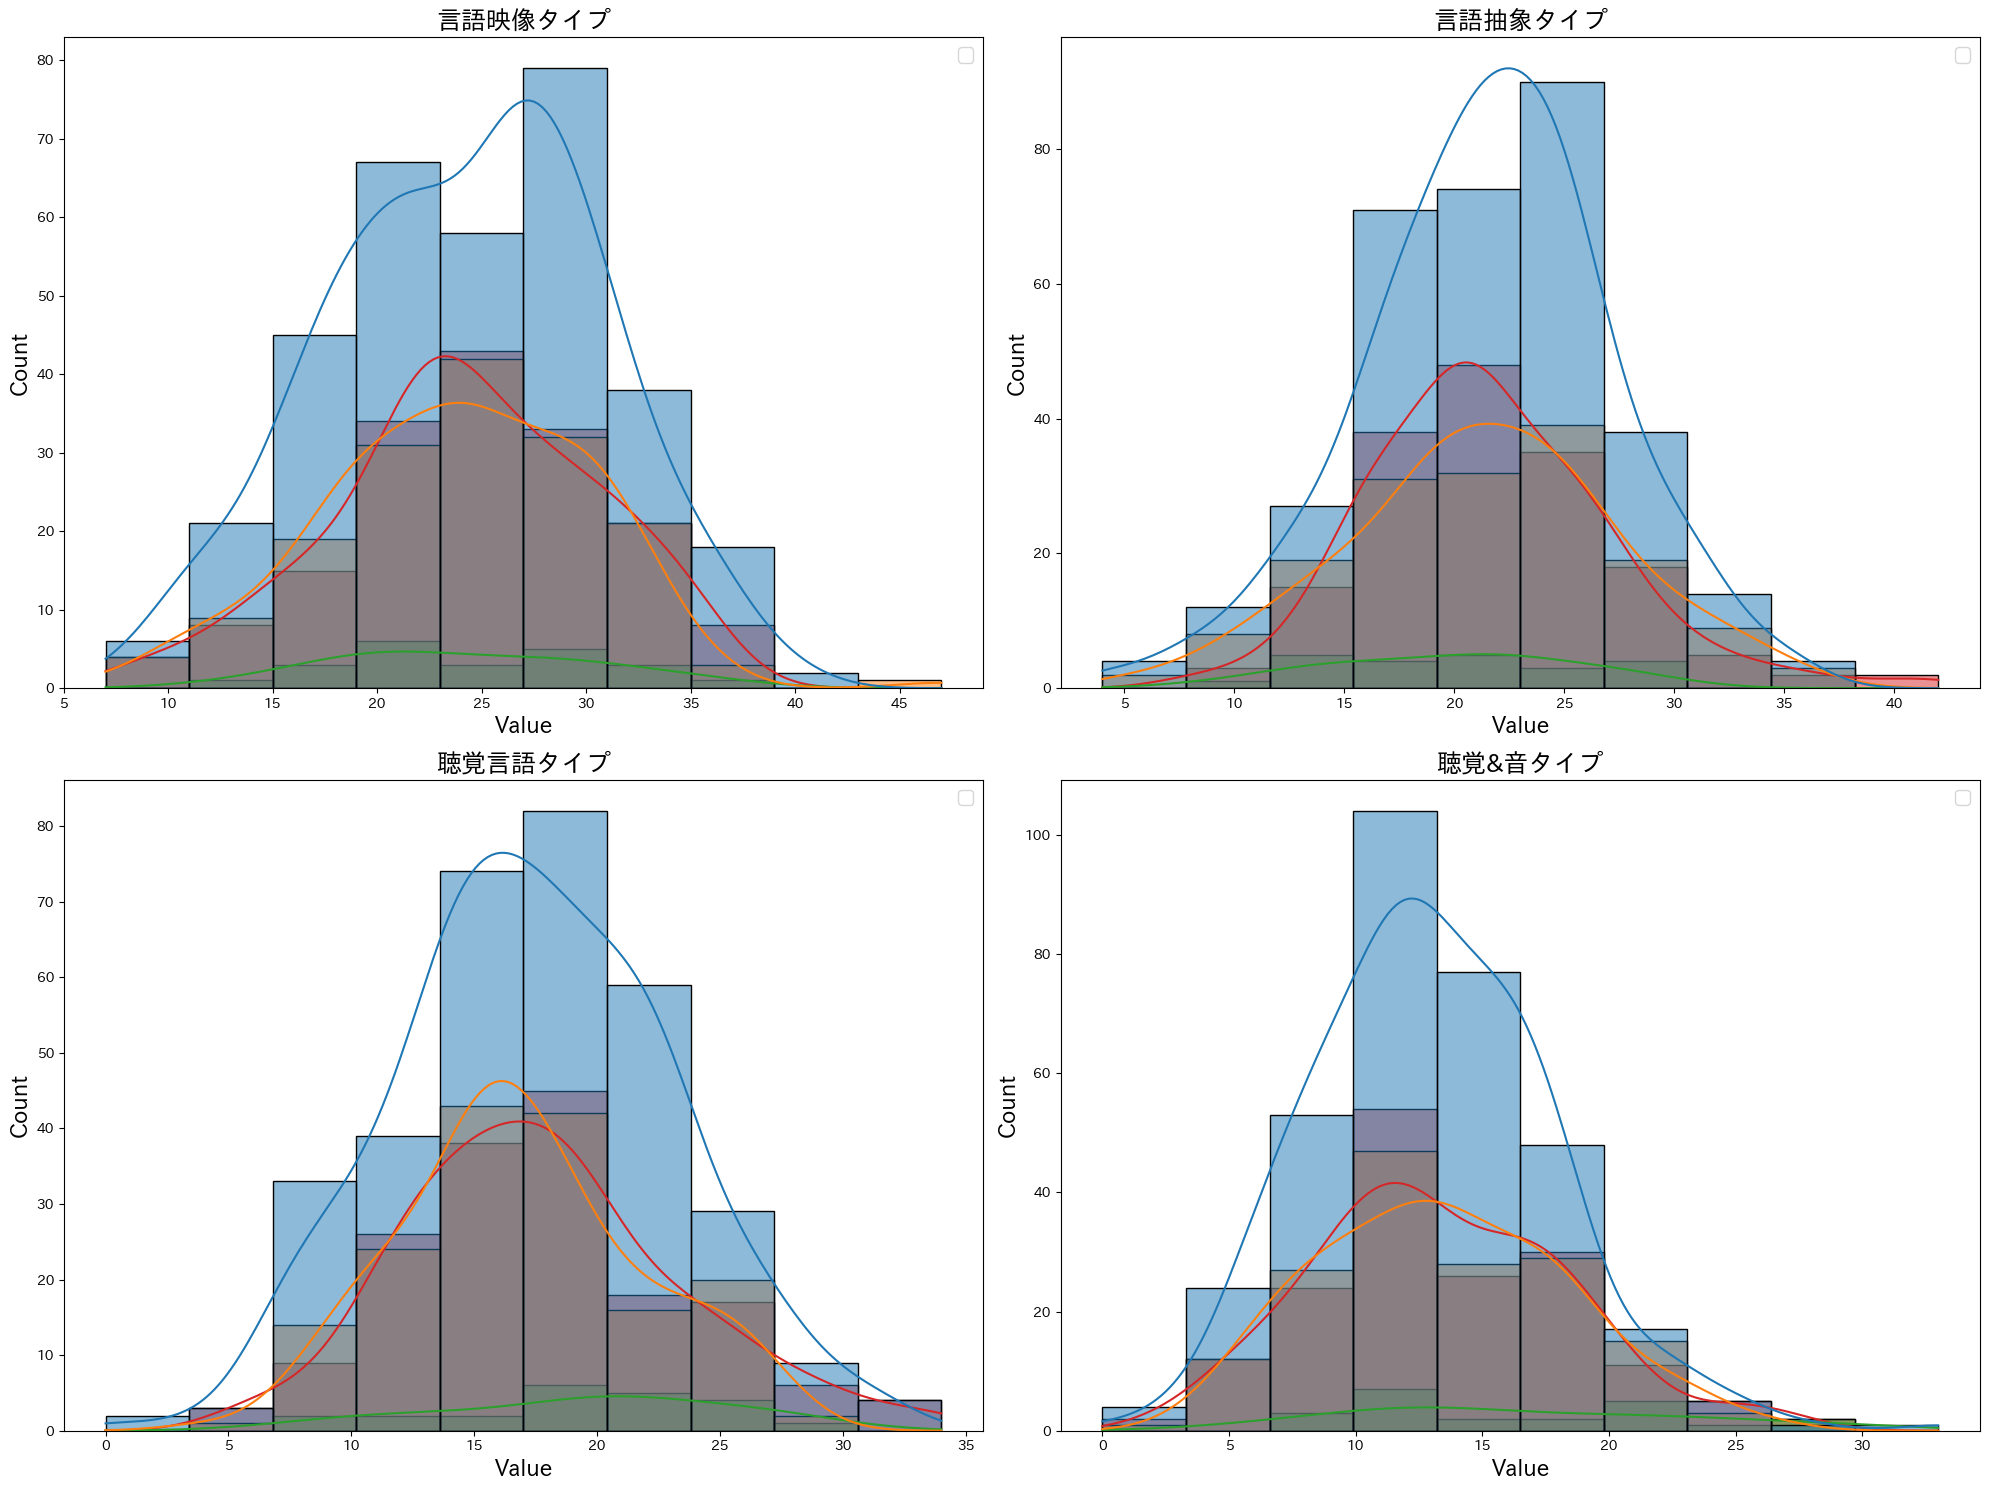

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

# 特徴量のリスト
features_group_4 = ['言語映像タイプ', '言語抽象タイプ', '聴覚言語タイプ', '聴覚&音タイプ']

# プロットの作成
fig, axes = plt.subplots(2, 2, figsize=(20, 15))

for i, feature in enumerate(features_group_4):
    ax = axes[i // 2, i % 2]
    sns.histplot(data=df_all_drop_exp, x=feature, hue='target', kde=True, ax=ax, bins=bin_count)
    ax.set_title(feature, fontsize=18)
    ax.set_xlabel('Value', fontsize=16)
    ax.set_ylabel('Count', fontsize=16)
    ax.legend(fontsize=14)  # レジェンドのフォントサイズを指定

plt.tight_layout()
plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


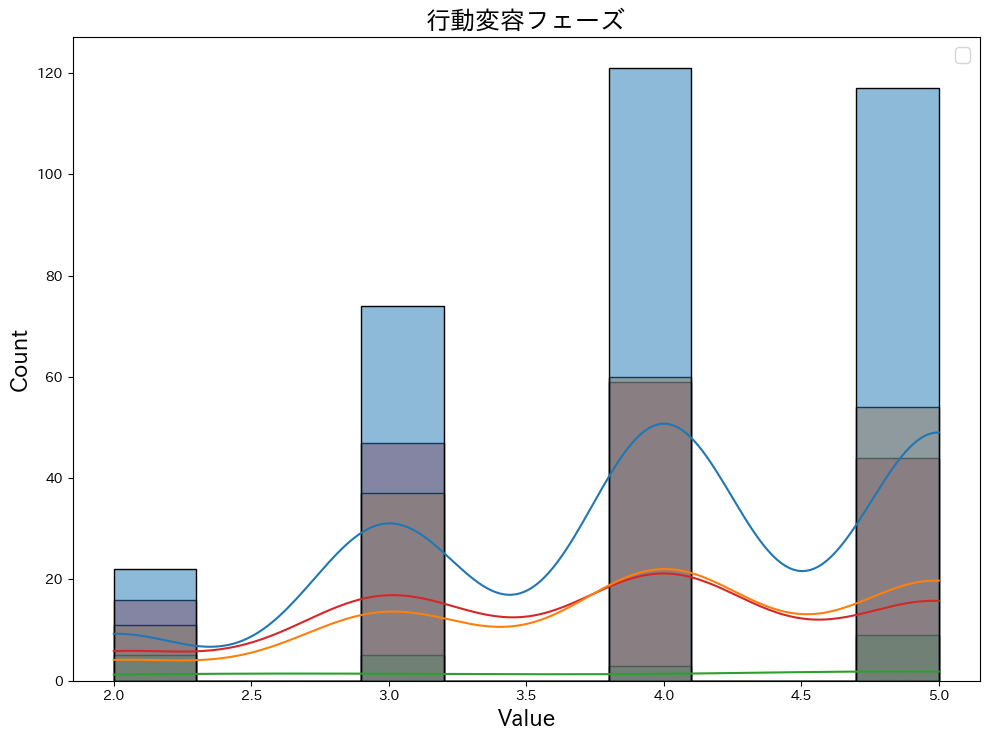

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

# 特徴量のリスト
features_group_5 = ['行動変容フェーズ']

# プロットの作成
fig, ax = plt.subplots(1, 1, figsize=(10, 7.5))

sns.histplot(data=df_all_drop_exp, x=features_group_5[0], hue='target', kde=True, ax=ax, bins=bin_count)
ax.set_title(features_group_5[0], fontsize=18)
ax.set_xlabel('Value', fontsize=16)
ax.set_ylabel('Count', fontsize=16)
ax.legend(fontsize=14)  # レジェンドのフォントサイズを指定

plt.tight_layout()
plt.show()


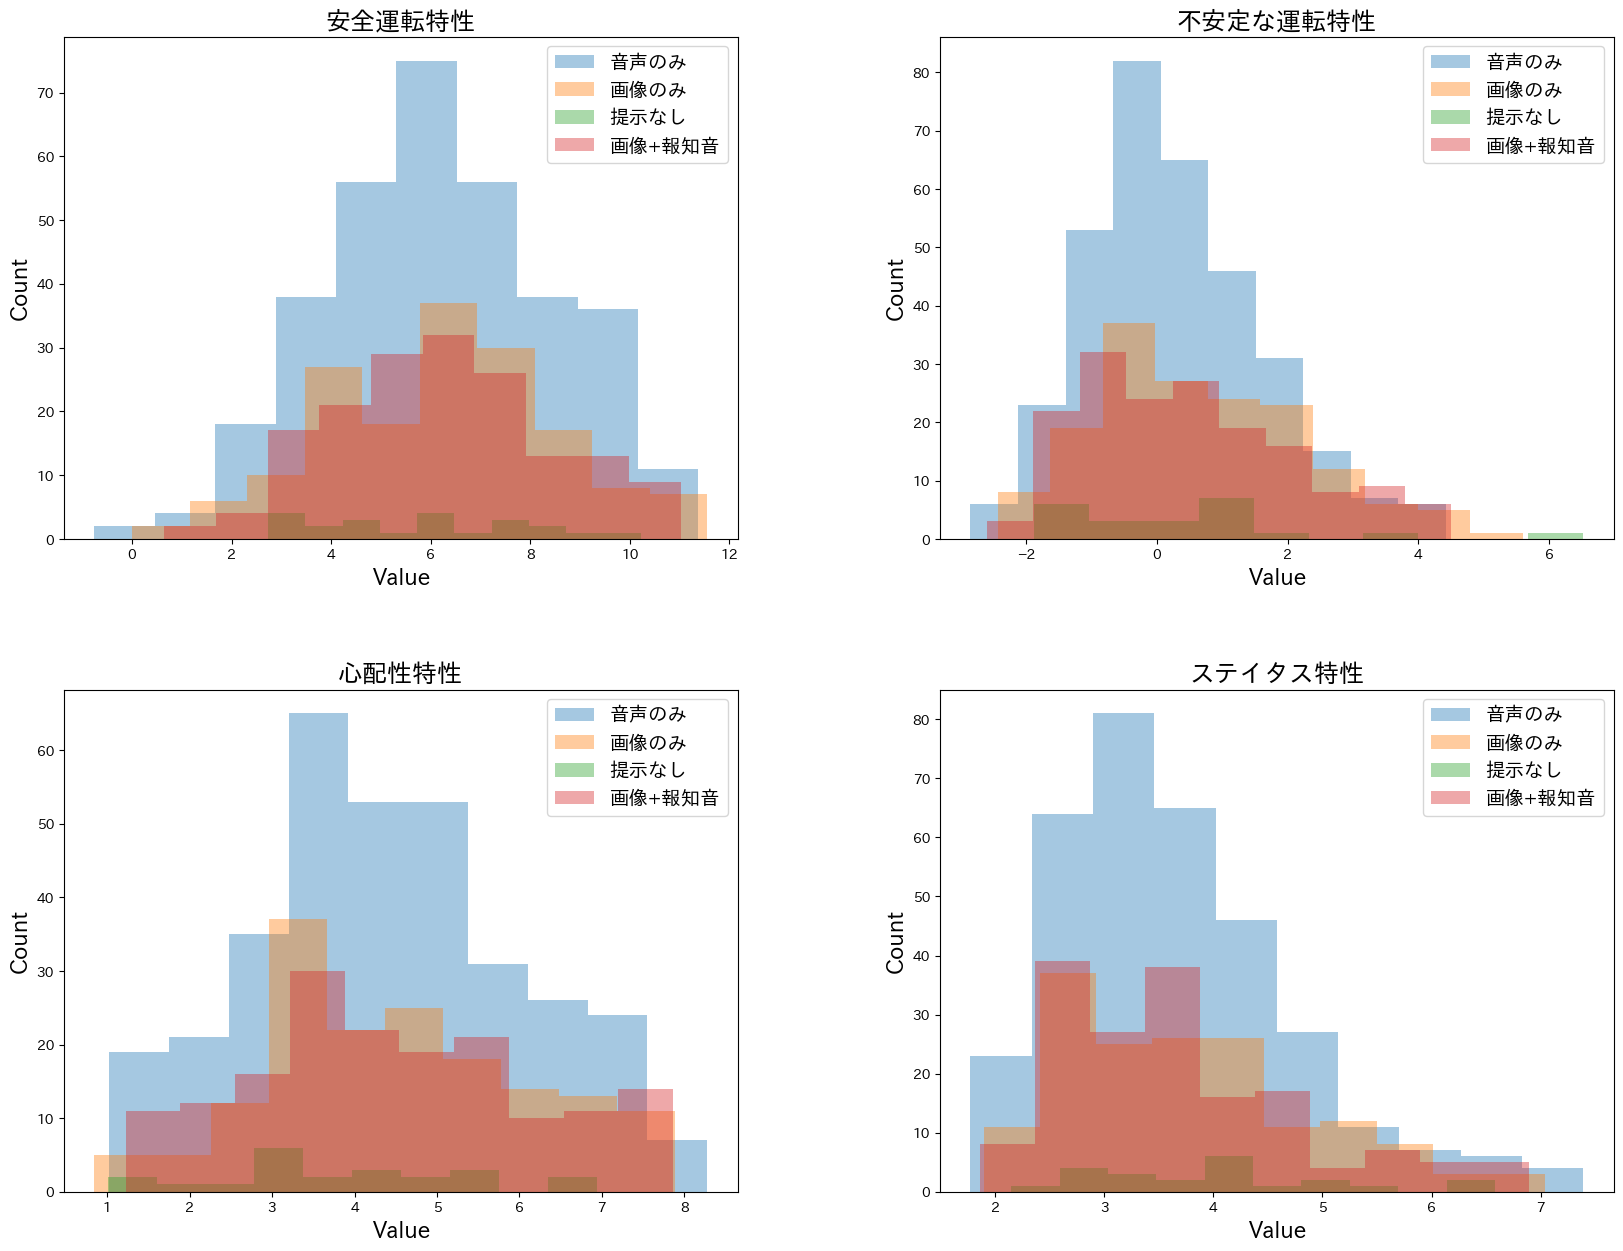

In [17]:
import matplotlib.pyplot as plt

# 特徴量のグループ化
features_group_1 = ['安全運転特性', '不安定な運転特性', '心配性特性', 'ステイタス特性']

# ヒストグラムを作成（最初の4つの特徴量）
fig = plt.figure(figsize=(20, 15))

for i, feature in enumerate(features_group_1):
    ax = fig.add_subplot(2, 2, i+1)
    for target in df_all_drop_exp['target'].unique():
        ax.hist(df_all_drop_exp[df_all_drop_exp['target'] == target][feature], bins=10, alpha=0.4, label=target)
    ax.set_title(feature, fontsize=18)
    ax.set_xlabel('Value', fontsize=16)
    ax.set_ylabel('Count', fontsize=16)
    ax.legend(fontsize=14)

plt.subplots_adjust(wspace=0.3, hspace=0.3)
plt.savefig('img_driving/img_driving_ave/fig1.png')
plt.show()


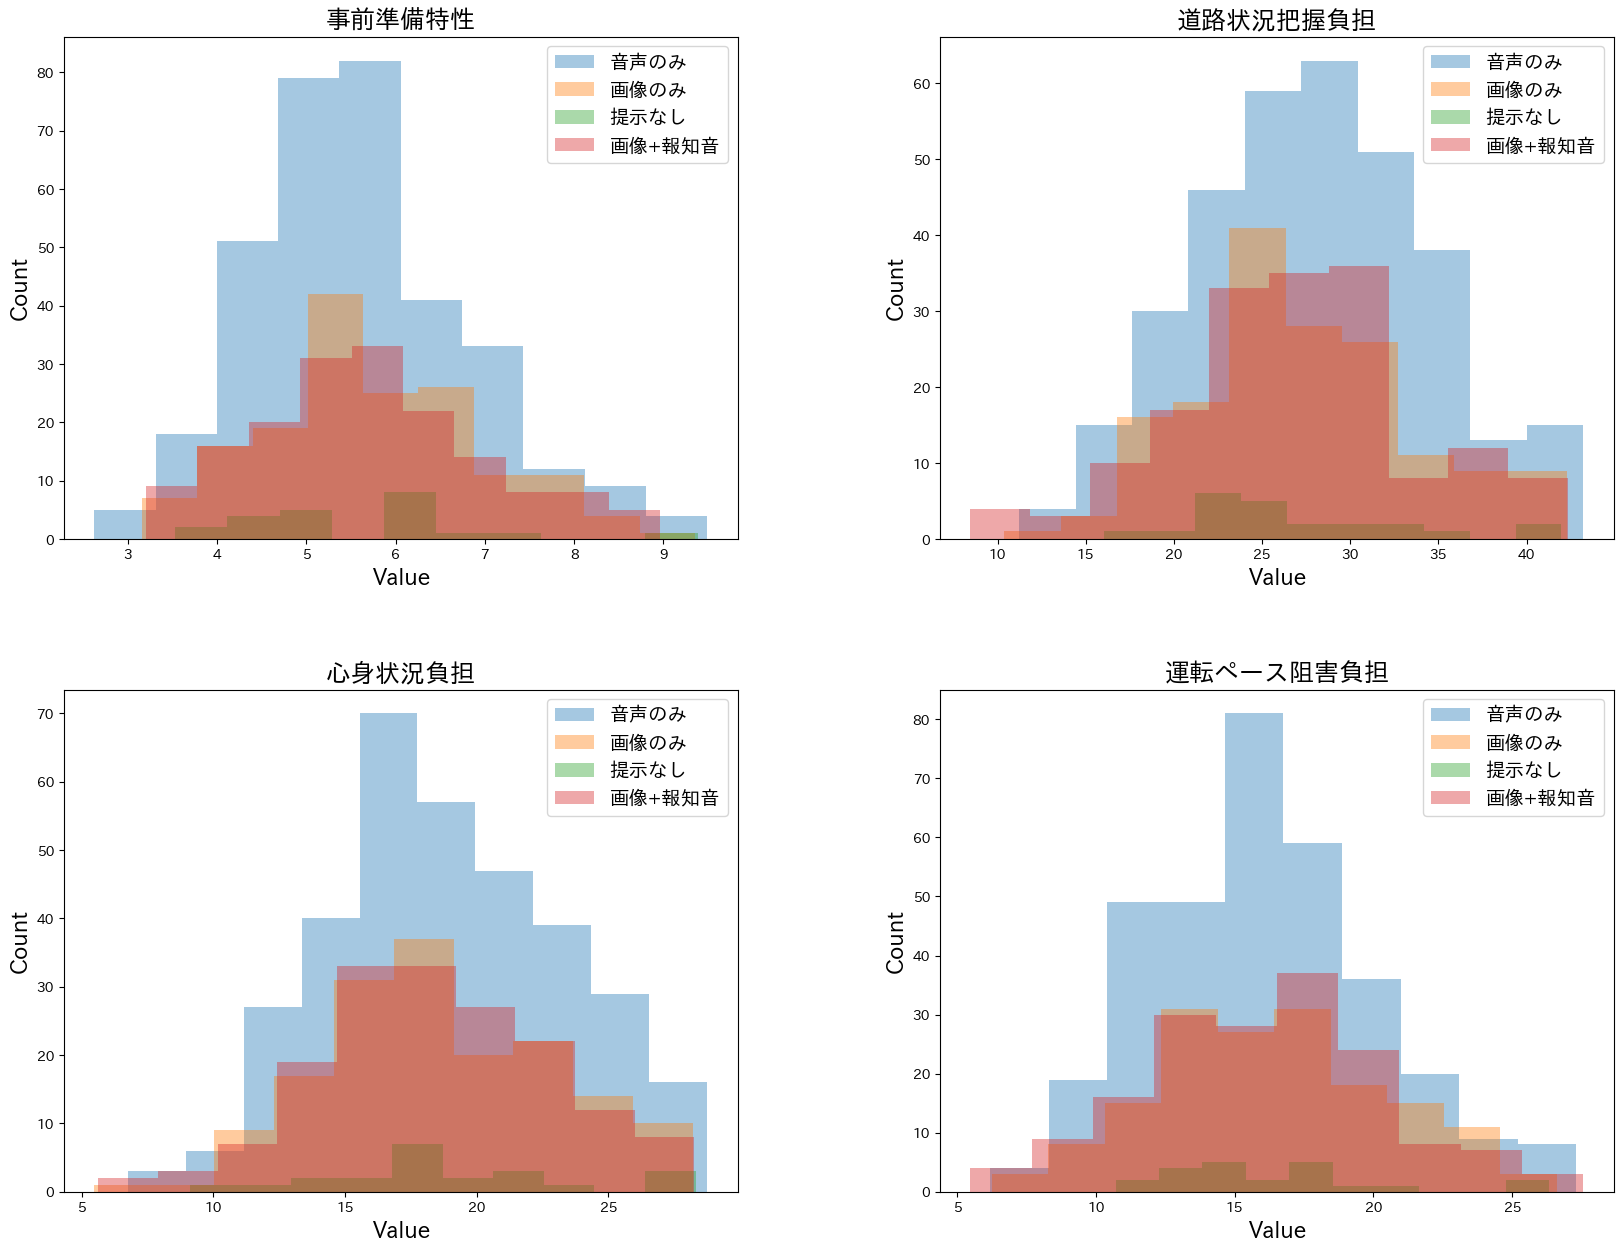

In [18]:
import matplotlib.pyplot as plt

# 特徴量のグループ化
features_group_2 = ['事前準備特性', '道路状況把握負担', '心身状況負担', '運転ペース阻害負担']

# ヒストグラムを作成（次の4つの特徴量）
fig = plt.figure(figsize=(20, 15))

for i, feature in enumerate(features_group_2):
    ax = fig.add_subplot(2, 2, i+1)
    for target in df_all_drop_exp['target'].unique():
        ax.hist(df_all_drop_exp[df_all_drop_exp['target'] == target][feature], bins=10, alpha=0.4, label=target)
    ax.set_title(feature, fontsize=18)
    ax.set_xlabel('Value', fontsize=16)
    ax.set_ylabel('Count', fontsize=16)
    ax.legend(fontsize=14)

plt.subplots_adjust(wspace=0.3, hspace=0.3)
plt.savefig('img_driving/img_driving_ave/fig2.png')
plt.show()


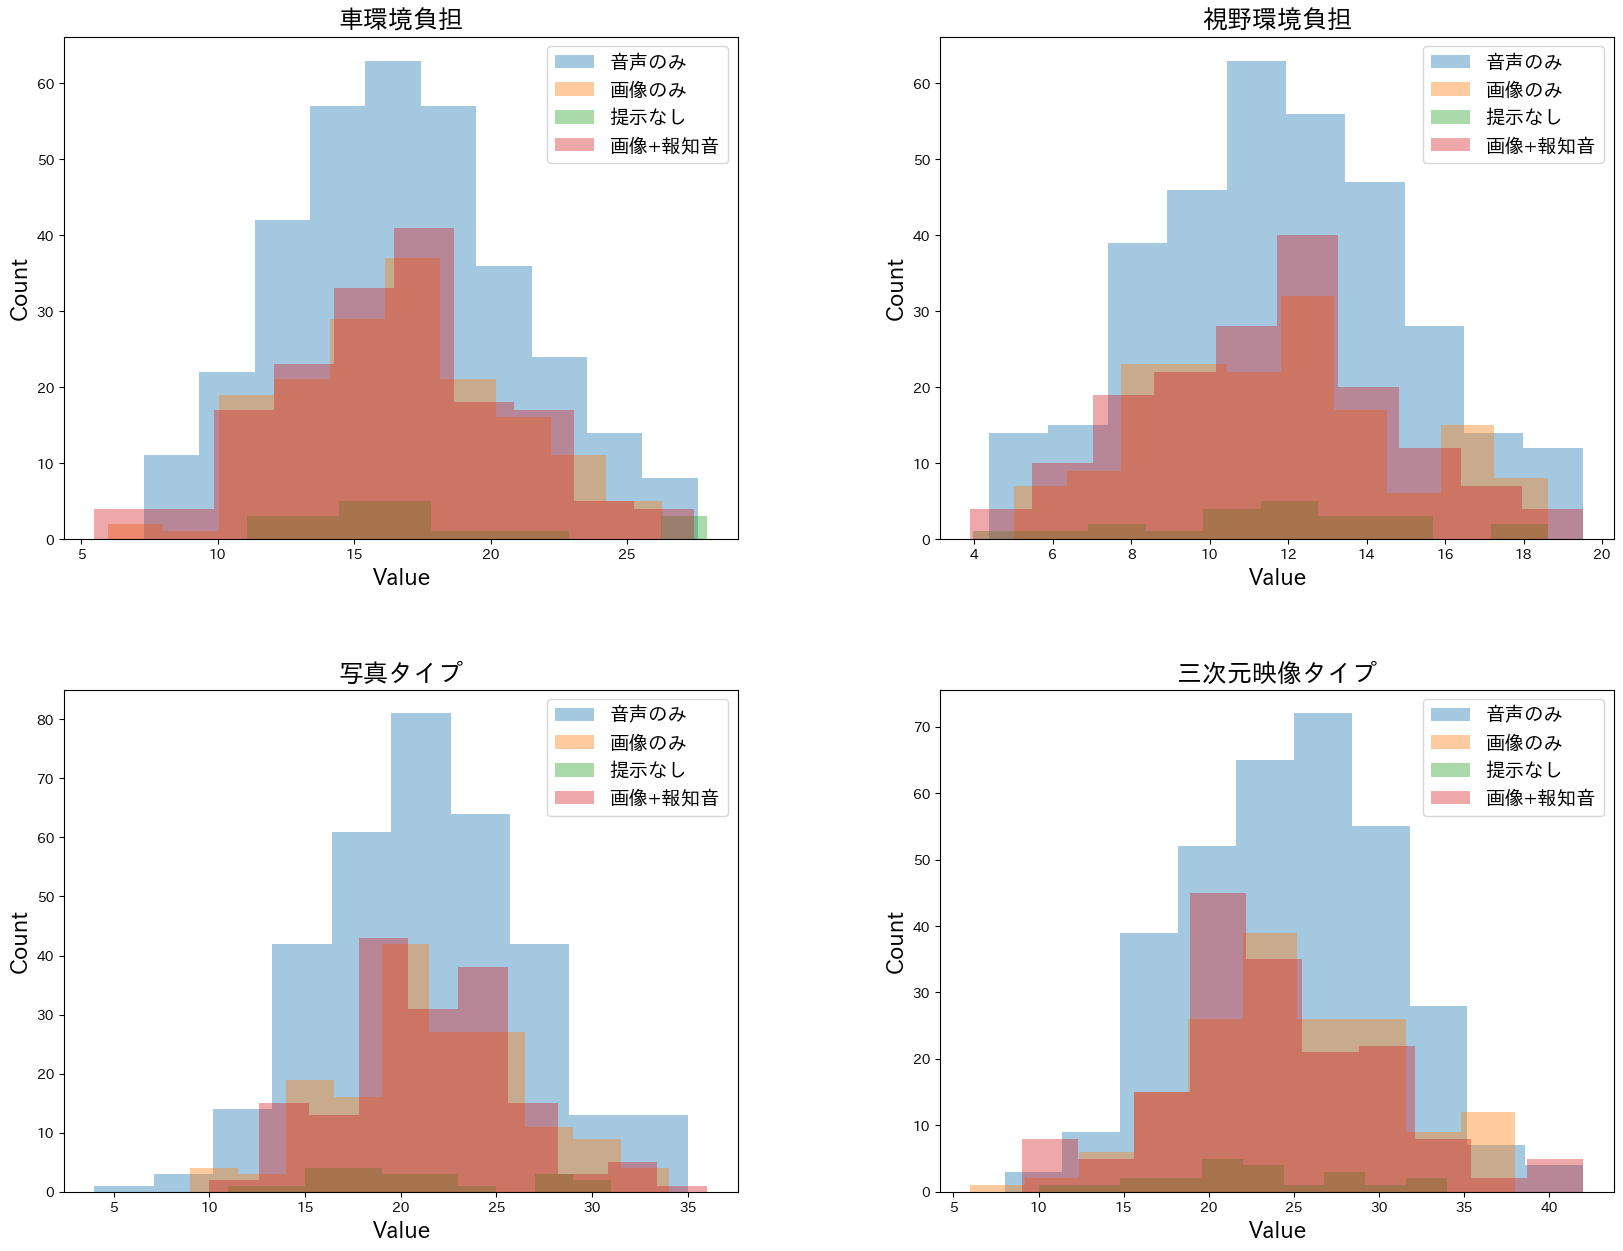

In [19]:
import matplotlib.pyplot as plt

# 特徴量のグループ化
features_group_3 = ['車環境負担', '視野環境負担', '写真タイプ', '三次元映像タイプ']

# ヒストグラムを作成（さらに次の4つの特徴量）
fig = plt.figure(figsize=(20, 15))

for i, feature in enumerate(features_group_3):
    ax = fig.add_subplot(2, 2, i+1)
    for target in df_all_drop_exp['target'].unique():
        ax.hist(df_all_drop_exp[df_all_drop_exp['target'] == target][feature], bins=10, alpha=0.4, label=target)
    ax.set_title(feature, fontsize=18)
    ax.set_xlabel('Value', fontsize=16)
    ax.set_ylabel('Count', fontsize=16)
    ax.legend(fontsize=14)

plt.subplots_adjust(wspace=0.3, hspace=0.3)
plt.show()


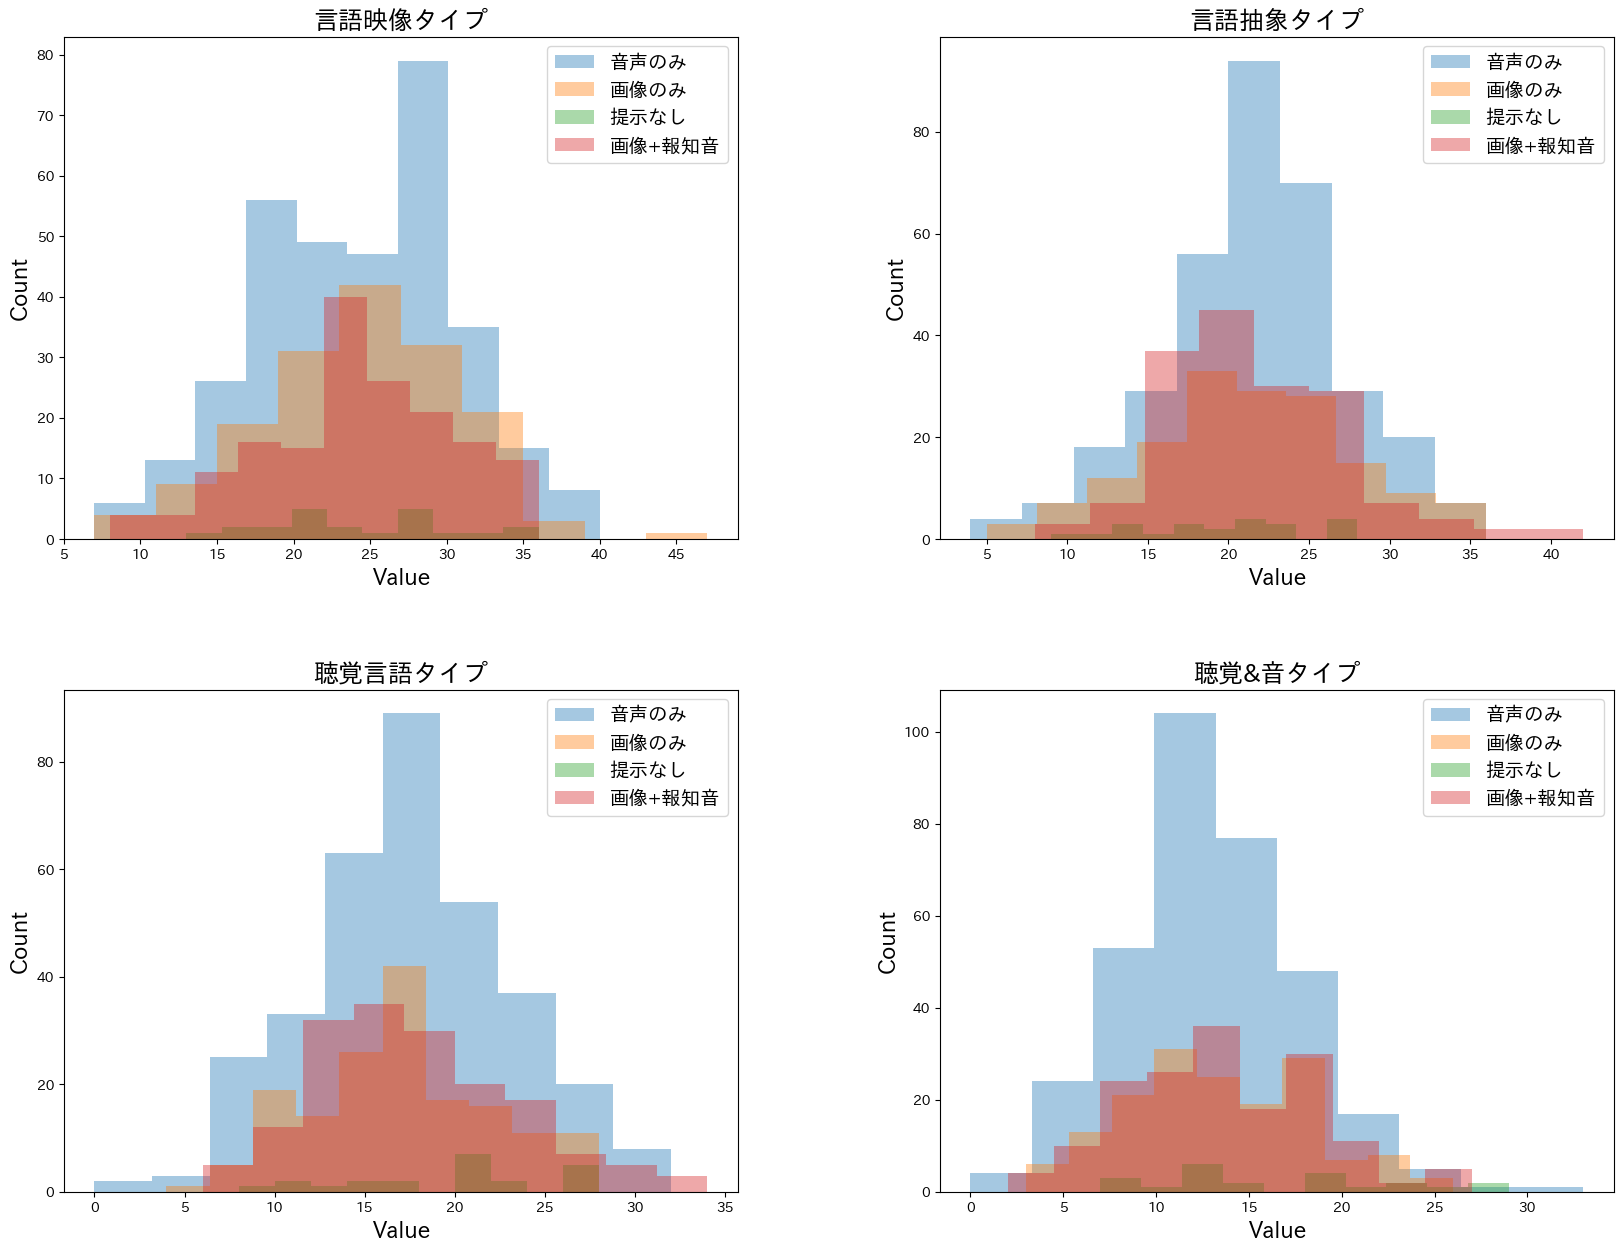

In [20]:
import matplotlib.pyplot as plt

# 特徴量のグループ化
features_group_4 = ['言語映像タイプ', '言語抽象タイプ', '聴覚言語タイプ', '聴覚&音タイプ']

# ヒストグラムを作成（さらに次の4つの特徴量）
fig = plt.figure(figsize=(20, 15))

for i, feature in enumerate(features_group_4):
    ax = fig.add_subplot(2, 2, i+1)
    for target in df_all_drop_exp['target'].unique():
        ax.hist(df_all_drop_exp[df_all_drop_exp['target'] == target][feature], bins=10, alpha=0.4, label=target)
    ax.set_title(feature, fontsize=18)
    ax.set_xlabel('Value', fontsize=16)
    ax.set_ylabel('Count', fontsize=16)
    ax.legend(fontsize=14)

plt.subplots_adjust(wspace=0.3, hspace=0.3)
plt.show()


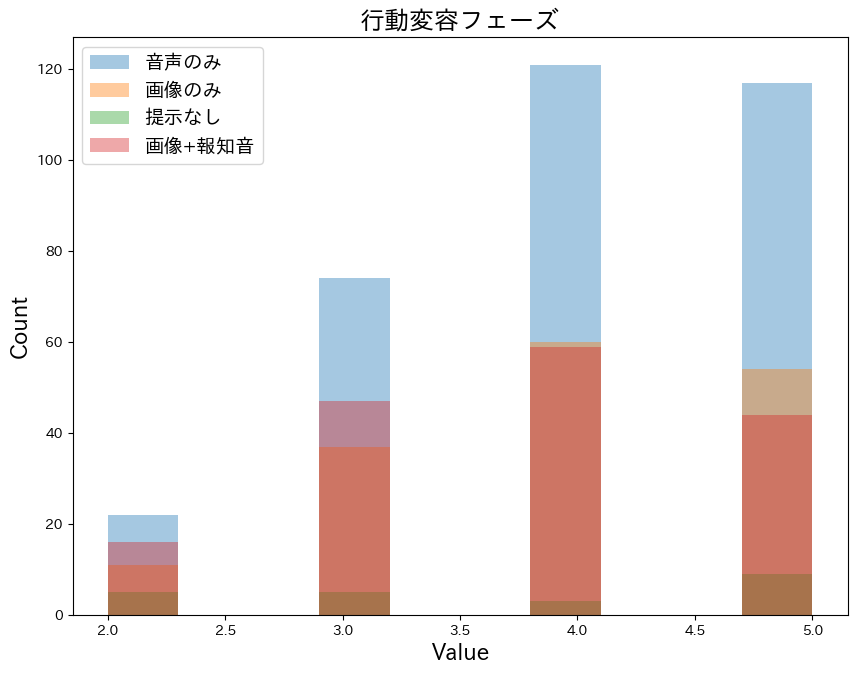

In [21]:
import matplotlib.pyplot as plt

# 特徴量のグループ化
features_group_5 = ['行動変容フェーズ']

# ヒストグラムを作成（最後の1つの特徴量）
fig = plt.figure(figsize=(10, 7.5))

for i, feature in enumerate(features_group_5):
    ax = fig.add_subplot(1, 1, i+1)
    for target in df_all_drop_exp['target'].unique():
        ax.hist(df_all_drop_exp[df_all_drop_exp['target'] == target][feature], bins=10, alpha=0.4, label=target)
    ax.set_title(feature, fontsize=18)
    ax.set_xlabel('Value', fontsize=16)
    ax.set_ylabel('Count', fontsize=16)
    ax.legend(fontsize=14)

plt.subplots_adjust(wspace=0.3, hspace=0.3)
plt.show()


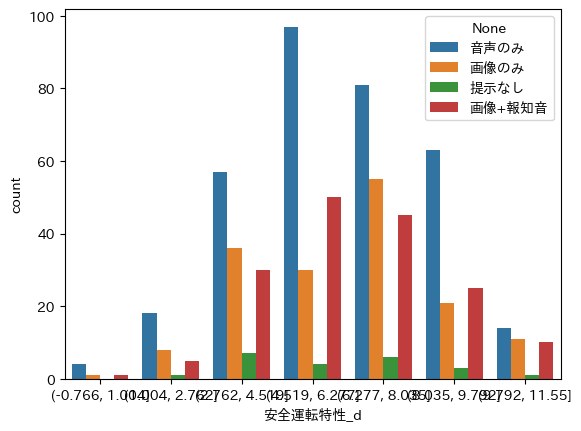

In [23]:
#d1ごとのyの値の分布
#d1の値を10分割
df_all_drop_exp['安全運転特性_d'] = pd.cut(df_all_drop_exp['安全運転特性'], 7)
sns.countplot(x='安全運転特性_d', hue=y, data=df_all_drop_exp)
# plt.savefig('img_countplot/d1.png')
plt.show()

<Axes: xlabel='不安定な運転特性_d', ylabel='count'>

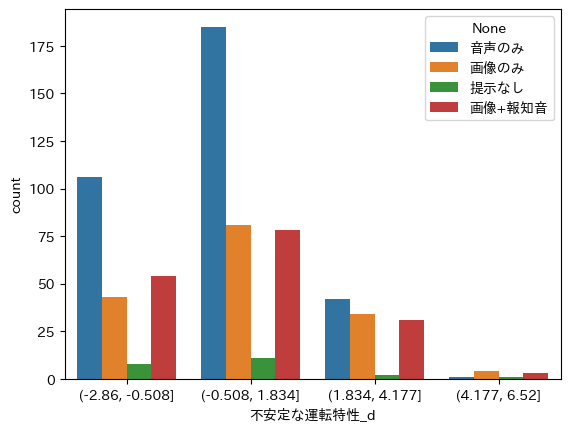

In [24]:

#d2ごとのyの値の分布
#d2の値を10分割
df_all_drop_exp['不安定な運転特性_d'] = pd.cut(df_all_drop_exp['不安定な運転特性'], 4)
sns.countplot(x='不安定な運転特性_d', hue=y, data=df_all_drop_exp)




In [25]:
# #d3ごとのyの値の分布
# #d3の値を10分割 
# df_all_drop_exp['d3_d'] = pd.cut(df_all_drop_exp['d3'], 5)
# sns.countplot(x='d3_d', hue=y, data=df_all_drop_exp)


In [26]:
# #pごとのyの値の分布

# sns.countplot(x='p', hue=y, data=df_all_drop_exp)

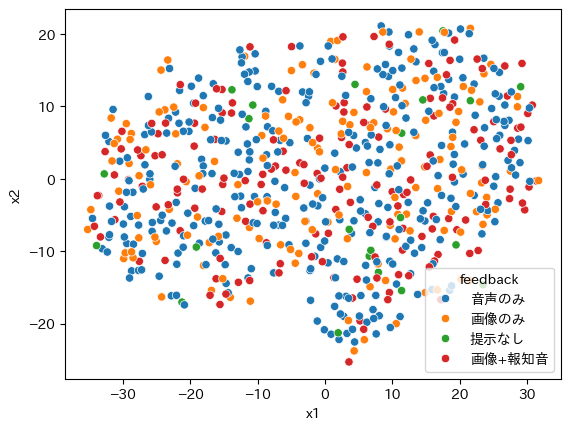

In [27]:
#t-sne
#空間が分離できているかどうかの確認
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=0)
tsne.fit(X)
x = tsne.fit_transform(X)

#xとyを結合
x = pd.DataFrame(x, columns=['x1', 'x2'])
x['feedback'] = y

#クラスタリング結果の可視化
sns.scatterplot(x='x1', y='x2', hue='feedback', data=x)
plt.savefig('img_tsne/tsne_visualization.png')  # 画像を保存
plt.show()


In [65]:
#k-means
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5, random_state=0)
kmeans.fit(X)
df_all_drop_exp['cluster'] = kmeans.labels_


/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


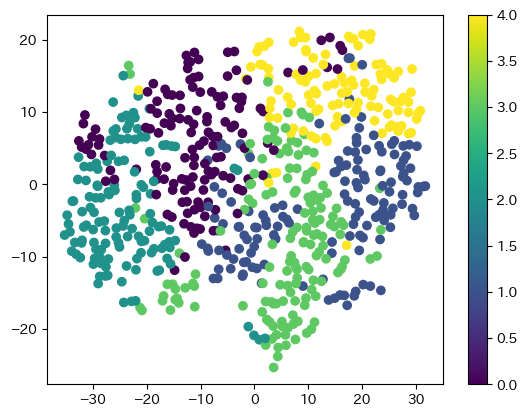

In [66]:
#クラスタリング結果の可視化
plt.scatter(x['x1'], x['x2'], c=df_all_drop_exp['cluster'])
plt.colorbar()
plt.show()


In [13]:
#各クラスタのサンプル数
df_all_drop_exp['cluster'].value_counts()


cluster
0    140
4    117
3    113
1    102
2    100
Name: count, dtype: int64

In [14]:
#クラスタごとの特徴量の平均値
df_all_drop_exp.groupby('cluster').mean()


,Unnamed: 0,d1,d2,d3,d4,d5,w1,w2,w3,w4,...,c3,c4,c5,c6,p,none_s,image_s,announce_s,image_sound_s,image_announce_s
cluster,,,,,,,,,,,,,,,,,,,,,
0,454.107143,5.995331,0.718124,4.046025,3.726776,5.611988,27.332031,18.161028,15.881003,16.321473,...,25.950000,25.142857,21.314286,15.157143,3.921429,2.463340,3.535079,3.662777,3.417776,3.773729
1,386.274510,6.082343,0.438744,4.802325,3.754805,5.667024,28.342830,20.004565,16.755422,17.180028,...,16.970588,18.078431,13.186275,12.421569,3.980392,2.306651,3.403592,3.656536,3.365901,3.737691
2,500.730000,7.034971,0.764644,5.033128,3.256937,5.479902,36.106867,24.311065,21.024726,21.690688,...,24.610000,23.500000,16.590000,12.600000,3.960000,2.251890,3.561776,3.816558,3.492998,3.901665
3,413.743363,6.303314,0.150990,4.481949,3.581314,5.595899,27.961702,19.001295,15.886863,16.834024,...,29.247788,19.415929,16.265487,10.814159,4.061947,2.369521,3.524089,3.753194,3.542474,3.791832
4,320.461538,6.057163,-0.204859,3.846233,3.853216,5.807433,19.655726,13.612662,11.544787,12.143488,...,23.897436,20.581197,17.820513,13.726496,4.025641,2.457362,3.386328,3.622988,3.379298,3.696103


In [15]:
#各クラスタごとのデータを確認
df_all_drop_exp[df_all_drop_exp['cluster'] == 0]


,Unnamed: 0,d1,d2,d3,d4,d5,w1,w2,w3,w4,...,c4,c5,c6,p,none_s,image_s,announce_s,image_sound_s,image_announce_s,cluster
4,7,3.1754,1.3641,3.3319,4.16365,5.05283,25.82371,17.81762,17.10696,16.27116,...,23,26,18,4,3.2222,3.0333,3.1778,2.9444,3.1222,0
5,8,1.9358,1.4126,1.6634,3.83981,4.92601,25.94360,19.05583,16.48970,17.84628,...,27,20,18,4,2.8778,2.9778,3.0889,3.0222,3.4889,0
9,15,7.1979,3.1578,5.4769,4.67814,7.07351,25.68948,17.77610,16.78791,17.17793,...,20,13,14,3,3.0000,3.0556,3.1111,3.6111,3.3778,0
17,25,7.3402,0.5217,4.8136,2.46789,5.48143,19.76761,13.97806,15.72307,15.17452,...,36,21,12,4,2.8444,2.9111,2.9889,3.1111,2.8778,0
19,28,1.4204,0.7808,2.5910,3.96974,5.01230,23.48230,17.47600,17.91716,15.60597,...,23,21,10,4,1.5000,3.1667,3.0778,3.1333,3.3111,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
560,789,6.7761,-2.0426,3.6700,2.64720,5.58436,23.68558,16.64941,12.64613,20.15784,...,23,14,13,5,3.2000,3.5444,3.9778,2.6222,2.8889,0
561,790,4.0589,1.1579,3.2375,4.26290,6.45476,24.12354,17.07318,15.49572,16.60862,...,40,15,7,3,2.5444,3.3889,3.2778,3.8333,3.8889,0
564,794,5.4807,0.5821,4.9548,2.95259,4.34303,31.49191,19.52468,13.36494,13.34895,...,25,25,23,5,2.9667,2.9556,3.6000,2.5889,3.2111,0
568,798,10.2154,-1.1652,5.1767,2.77794,4.07748,21.64954,14.42384,14.39132,14.72991,...,13,21,29,2,2.9667,2.8222,2.7556,2.8667,2.8778,0


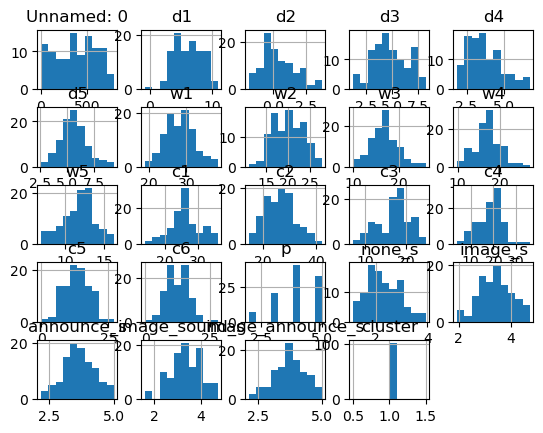

In [16]:
#クラスタ1の特徴量の分布
df_all_drop_exp[df_all_drop_exp['cluster']==1].hist()
plt.show()


<Figure size 2000x1500 with 0 Axes>

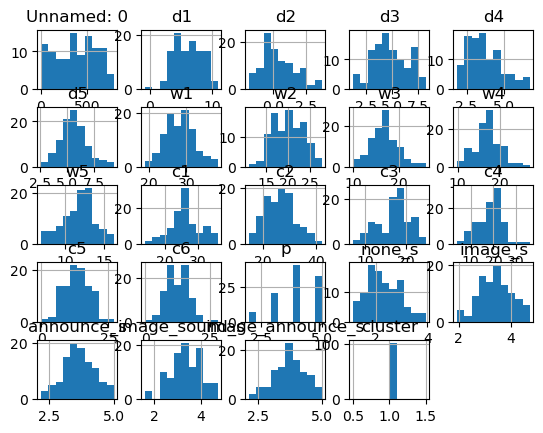

In [17]:
import matplotlib.pyplot as plt

# クラスタ1の特徴量の分布
plt.figure(figsize=(20, 15))  # 表示サイズを指定
df_all_drop_exp[df_all_drop_exp['cluster'] == 1].hist()
plt.show()


<Figure size 10000x3000 with 0 Axes>

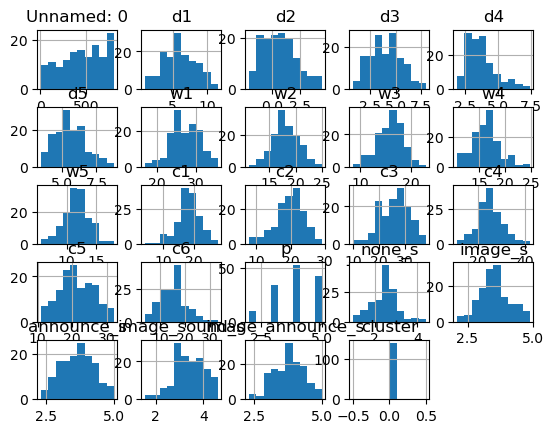

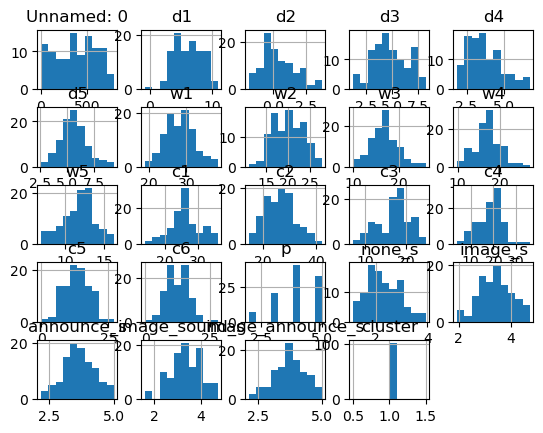

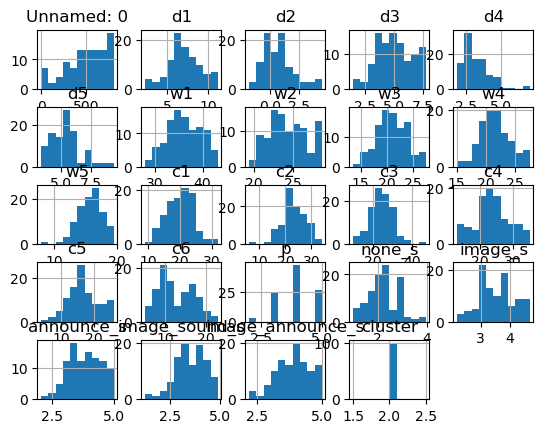

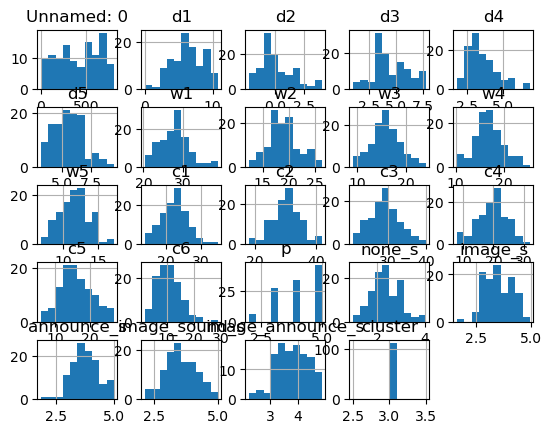

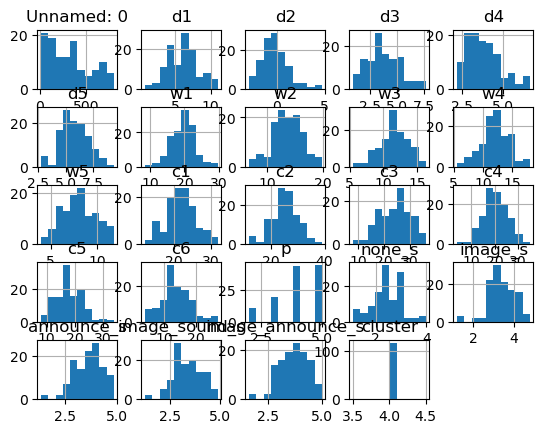

In [18]:
#クラスタごとの特徴量の分布(ヒストグラム)
#サイズの調整
plt.figure(figsize=(100, 30))
df_all_drop_exp.groupby('cluster').hist()
plt.show()

<Figure size 10000x3000 with 0 Axes>

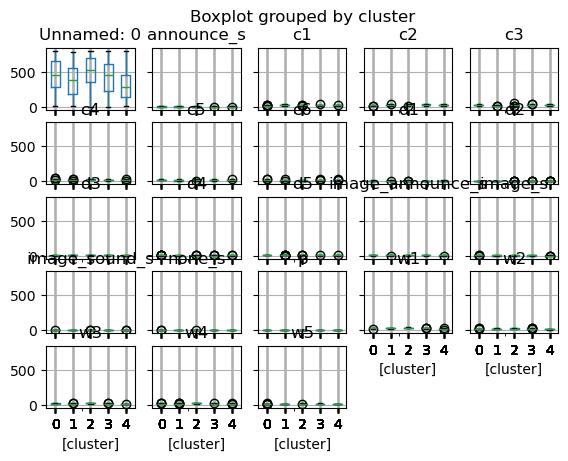

In [19]:
#クラスタごとの特徴量の分布(箱ひげ図)
#サイズの調整
plt.figure(figsize=(100, 30))
df_all_drop_exp.boxplot(by='cluster')
plt.show()


/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/

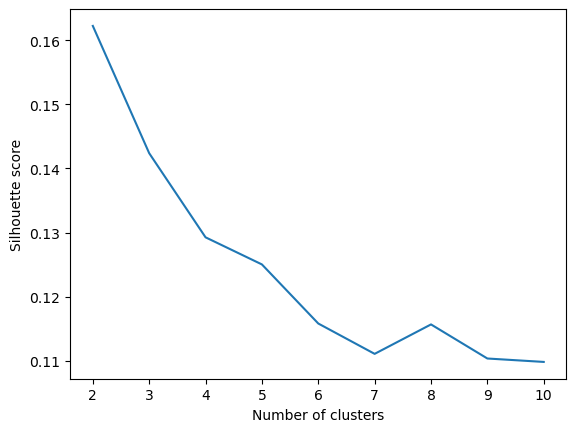

In [20]:
#シルエット係数
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
silhouette_scores = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(X)
    silhouette_scores.append(silhouette_score(X, kmeans.labels_))
plt.plot(range(2, 11), silhouette_scores)
plt.xlabel("Number of clusters")
plt.ylabel("Silhouette score")
plt.show()

/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/

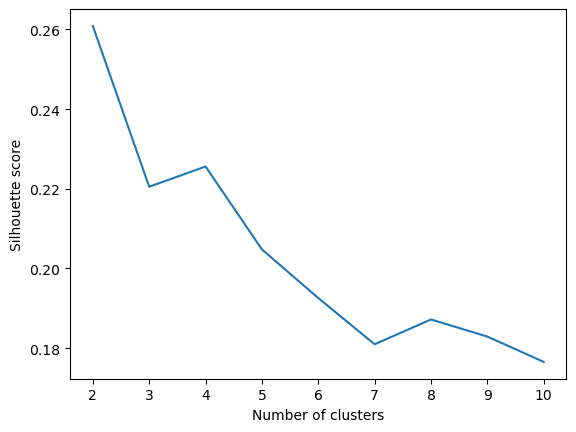

In [23]:
# 特徴量とターゲット変数の設定
features = ['d1', 'd2', 'd3', 'd4', 'd5']
X = df_all_drop_exp[features]
#シルエット係数
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
silhouette_scores = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(X)
    silhouette_scores.append(silhouette_score(X, kmeans.labels_))
plt.plot(range(2, 11), silhouette_scores)
plt.xlabel("Number of clusters")
plt.ylabel("Silhouette score")
plt.show()

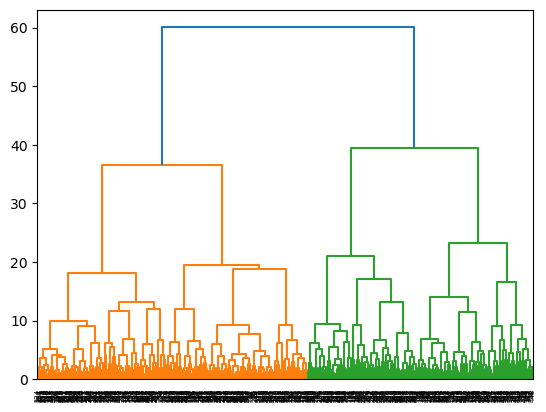

In [24]:
#階層的クラスタリング
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt
# クラスタリングの実行
result1 = linkage(X, method='ward')
# デンドログラムの表示
dendrogram(result1)
plt.show()
